# Task:
### Find out the mass (solar mass units) and radius (km) of the star using regular TOV code as well as enthalpy method. Compare the two in terms of code running time. They should both agree to better than a fraction of a % if you wrote the code right.

In [1]:

import pandas as pd
import numpy as np
import scipy.interpolate
import numpy as np
import math
import scipy as sp
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df = pd.DataFrame()

In [3]:
#energy density(g/cm3)    pressure (dynes/cm2)   enthalpy (cm2/s2)    baryon number density (cm-3)  

In [4]:

df = pd.read_table('eosA-final', delim_whitespace=True, header=0)



In [5]:
data = df.copy(deep= True)
data



,Enthalpy,Pressure(1/km2),Energy,(1/km2)
0,2.329500e+00,4.610880e-02,4.541520e-02,NaN
1,2.046880e+00,2.686990e-02,2.793050e-02,NaN
2,1.772940e+00,1.565830e-02,1.757000e-02,NaN
3,1.511420e+00,9.124870e-03,1.140640e-02,NaN
4,1.265930e+00,5.317500e-03,7.577340e-03,NaN
5,1.039890e+00,3.098770e-03,5.200480e-03,NaN
6,8.373410e-01,1.805800e-03,3.704670e-03,NaN
7,6.612450e-01,1.052330e-03,2.717050e-03,NaN
8,5.125960e-01,6.132420e-04,2.043600e-03,NaN
9,3.909150e-01,3.573660e-04,1.574710e-03,NaN


In [6]:
data = data.iloc[13:]
data

,Enthalpy,Pressure(1/km2),Energy,(1/km2)
13,1.208230e-01,4.121320e-05,6.408510e-04,NaN
14,8.973820e-02,2.401700e-05,5.201220e-04,NaN
15,6.818290e-02,1.399580e-05,4.730850e-04,NaN
16,5.429280e-02,8.156060e-06,4.303660e-04,NaN
17,4.489470e-02,4.752920e-06,3.525400e-04,NaN
18,3.791870e-02,2.769760e-06,2.687270e-04,NaN
19,3.251780e-02,1.614070e-06,2.015880e-04,NaN
20,2.826040e-02,9.405950e-07,1.475140e-04,NaN
21,2.485790e-02,5.481320e-07,1.076260e-04,NaN
22,2.212170e-02,3.194230e-07,7.756980e-05,NaN


In [7]:
#constants
c = 3.0*10**(10)
G = 6.676*10**(-8)
kgkm = 7.426*10**(-31)

# Remember!

\begin{align}
\frac{dr^2(h)}{dh} = -\ 2r^2  \frac{r - 2m}{m + 4 \pi p r^3}\, \\
\frac{dm(h)}{dh} & = 4 \pi \varepsilon r^3 \frac{r - 2m}{m + 4 \pi p r^3} \\
r^2(h) = \frac{3(h_c - h)}{2 \pi (3p_c - \varepsilon)}  \\
m(h) & = \frac{4}{\pi} \varepsilon_c r^3
\end{align}

In [8]:

h_eosA = data['Enthalpy'].tolist()
p_eosA = data['Pressure(1/km2)'].tolist()
e_eosA = data['Energy'].tolist()



In [9]:
# from bisect import bisect_left

# class Interpolate(object):
#     def __init__(self, x_list, y_list):
#         if any(y - x <= 0 for x, y in zip(x_list, x_list[1:])):
#             raise ValueError("x_list must be in strictly ascending order!")
#         x_list = self.x_list = list(map(float, x_list))
#         y_list = self.y_list = list(map(float, y_list))
#         intervals = zip(x_list, x_list[1:], y_list, y_list[1:])
#         self.slopes = [(y2 - y1)/(x2 - x1) for x1, x2, y1, y2 in intervals]

#     def __getitem__(self, x):
#         i = bisect_left(self.x_list, x) - 1
#         return self.y_list[i] + self.slopes[i] * (x - self.x_list[i])


In [10]:
# i = Interpolate([1, 2.5, 3.4, 5.8, 6], [2, 4, 5.8, 4.3, 4])
# # Get the interpolated value at x = 4:
# y = i[4]
# y

In [11]:
h_array=np.array(data['Enthalpy'],dtype=float)
p_array=np.array(data['Pressure(1/km2)'],dtype=float)
e_array=np.array(data['Energy'],dtype=float)

h_eosa = h_array[::-1]                        #dimensionless
p_eosa = p_array[::-1]        #1/km^2
e_eosa = e_array[::-1]         #1/km^2


h_eosa1 = h_array[::-1]                        #dimensionless
p_eosa1 = p_array[::-1]       #1/km^2
e_eosa1 = e_array[::-1]    

In [12]:
#interpolate = lambda x, y, mult: map(lambda (a,b): a*(1-mult) + b*(mult), zip(x, y))
#f = interpolate.interp1d(h_eosa[0:20], h_eosa[21:41])
# h_interpolated = np.interp(h_eosa[0:100], h_eosa[0:40], h_eosa[40:80])
# h_interpolated

In [13]:
# np.savetxt("converted_eos_A.txt", np.c_[h_eosa,p_eosa,e_eosa], fmt="%-.12e",delimiter=' ',newline='\n',\
#            header='Enthalpy  Pressure(1\km^2)  Energy density(1\km^2)')

In [14]:
# following lines interpolate data from file with # lines = count written in C code*/

# for (j = k+1; j < count-2; j++)
# dh=hi-h[j];
# drsq=dh*(2.0*ri*ri)*(ri-2.0*mi)/(mi+4.0*Pi*p[j-1]*pow(ri,3.0));
# dm=dh*(4.0*Pi*e[j-1]*ri*ri*ri*(ri-2.0*mi))/(mi+4.0*Pi*p[j-1]*pow(ri,3.0));
# mi=mi+dm; /*update mass*/
# ri=ri+(drsq/(2.0*ri)); /*update radius*/
# printf("%e\t%e\t%e\n",h[j]/h[k],mi,ri);
# hi=h[j];
# 

In [15]:
p_eosa

array([9.49209e-26, 1.62885e-25, 2.79513e-25, 4.79645e-25, 8.23076e-25,
       1.41240e-24, 2.42369e-24, 4.15907e-24, 7.13699e-24, 1.22471e-23,
       2.10161e-23, 3.60639e-23, 6.18858e-23, 1.06197e-22, 1.82234e-22,
       3.12715e-22, 5.36620e-22, 9.20841e-22, 1.58018e-21, 2.71159e-21,
       4.65311e-21, 7.98474e-21, 1.37019e-20, 2.35126e-20, 4.03478e-20,
       6.92370e-20, 1.18812e-19, 2.03881e-19, 3.49861e-19, 6.00364e-19,
       1.03023e-18, 1.76788e-18, 3.03369e-18, 5.20584e-18, 8.93328e-18,
       1.53296e-17, 2.63055e-17, 4.51405e-17, 7.74613e-17, 1.32924e-16,
       2.28099e-16, 3.91420e-16, 6.71679e-16, 1.15260e-15, 1.97788e-15,
       3.39406e-15, 5.82422e-15, 9.99440e-15, 1.71504e-14, 2.94303e-14,
       5.05027e-14, 8.66631e-14, 1.48714e-13, 2.55194e-13, 4.37915e-13,
       7.51466e-13, 1.28952e-12, 2.21283e-12, 3.79722e-12, 6.51606e-12,
       1.11816e-11, 1.91877e-11, 3.29262e-11, 5.65016e-11, 9.69572e-11,
       1.66379e-10, 2.85508e-10, 4.89934e-10, 8.40728e-10, 1.442

In [16]:
def interpolate(stuff):
    new_list = []
    for i, enthalpy in enumerate(stuff[1:]):
        j=0
        while j < 1000:
            new_list.append(stuff[i]+((stuff[i+1] - stuff[i])/1000)*j) 
            j+=1
    return new_list

h_eosa = interpolate(h_eosa1)
p_eosa = interpolate(p_eosa1)
e_eosa = interpolate(e_eosa1)


In [17]:
# h_eosa[0:90888] = h_eosa
# e_eosa[0:90888] = e_eosa
# p_eosa[0:90888] = p_eosa


# h_eosa[::-1] = h_eosa
# h_eosa[102:] = h_eosa
# h_eosa[::-1] = h_eosa

# p_eosa[::-1] = p_eosa
# p_eosa[102:] = p_eosa
# p_eosa[::-1] = p_eosa


# e_eosa[::-1] = e_eosa
# e_eosa[102:] = e_eosa
# e_eosa[::-1] = e_eosa
# len(h_eosa)
# out = open("interpolatedEOSA.txt", "w")
# for line in h_eosa:
#   # write line to output file
#   out.write(line)
#   out.write("\n")
# # out.close()
# with open("interpolatedEOSA.txt","w") as f:
#     for (h_eosa,p_eosa,e_eosa) in zip(h_eosa,p_eosa,e_eosa):
#         f.write("{0},{1},{2}\n".format(h_eosa,p_eosa,e_eosa))

In [18]:
#RK4 Routine:

from math import pi
import numpy as np
class Step:    
    
    def __init__(self, t, p, e, y):

        self.t = t
        self.p = p
        self.e = e
        self.y = y
        self.f = np.zeros(2,dtype=float)

        self.k1 = np.zeros(2, dtype=float)
        self.k2 = np.zeros(2, dtype=float)
        self.k3 = np.zeros(2, dtype=float)
        self.k4 = np.zeros(2, dtype=float)
        self.dt=[]

        for j in np.arange(len(h_eosa)-1):
            self.dt.append(self.t[j]-self.t[j+1])
        self.dt.append(self.dt[-1]+(self.t[-1]-self.t[-2]))
        
#     def interpolate():
        
#         self.dt=[]
#         self.de=[]
#         self.dp=[]

#         for j in np.arange(len(h_eosa)-1):
#             self.dt.append(self.t[j]-self.t[j+1])
#         self.dt.append(self.dt[-1]+(self.t[-1]-self.t[-2]))
        
        
#         for j in np.arange(len(e_eosa)-1):
#             self.de.append(self.e[j]-self.e[j+1])
#         self.de.append(self.de[-1]+(self.e[-1]-self.e[-2]))
        
#         for j in np.arange(len(p_eosa)-1):
#             self.dp.append(self.p[j]-self.p[j+1])
#         self.dp.append(self.dp[-1]+(self.p[-1]-self.p[-2]))
        
#         while i <100000:
#             e_int = []
#             p_int = []
            
#             for i, enthalpy in enumerate(t[:-2]):
#                 while i < 1000:
#                     enthalpy+((self.t - self.t[i])/1000)*i 
#                     e_int = self.e[i] + (self.de/self.dt)*(self.t - self.t[i])
#                     p_int = self.p[i] + (self.dp/self.dt)*(self.t - self.t[i])
        
    def _deriv(self, t, y, i):
        r = np.sqrt(self.y[0]) #radius   
        
        
        Arg = (r-2.0*self.y[1])/(self.y[1]+4.0*np.pi*self.p[i]*r**3.0)
        
        
        self.f[0]=-2.0*self.y[0]*Arg
        
#         self.f[1] = 4.0*self.e[i]*r**(3.0)*(r-2.0*self.y[1])/(self.y[1]+4.0*np.pi*self.p[i]*r**3.0)
        
        
        self.f[1] = 2*pi*self.e[i]*r*self.f[0]
        
        
#         self.f[0]=-2.0*self.y[0]*(self.y[0]**(0.5)-2.0*self.y[1])/(self.y[1]+4.0*np.pi*self.p[i]*self.y[0])
    
#         self.f[1] = 2.00001*np.pi*self.e[i]*(r)*self.f[0]
#         Arg = (r-2.0*self.y[1])/(self.y[1]+4.0*np.pi*self.p[i]*r**1.5)
        
#         self.f[0]=-2.0*self.y[0]*(self.y[0]**(0.5)-2.0*self.y[1])/(self.y[1]+4.0*np.pi*self.p[i]*self.y[0])
        
#         self.f[1] = 4.0*np.pi*r**(3.0)*self.e[i]*((r-2.0*self.y[1])/(self.y[1]+4.0*np.pi*self.p[i]*r**(3.0)))
        
#         self.f[1] = 4.0*np.pi*self.e[i]*y[0]**(1.5)*(self.y[0]**(0.5)-2.0*self.y[1])/(self.y[1]+4.0*np.pi*self.p[i]*self.y[0])
        
#         self.f[1] = 2.00001*np.pi*self.e[i]*np.sqrt(y[0])*self.f[0]
    
        return self.f
    '''''
    Remember that single underscore means its weakly private which means it singals to the 
    code for this to not be used by external parts of the code.
    Strongly private methods and attributes have a double underscore at 
    the beginning of their names. This causes their names to be mangled, 
    which means that they can't be accessed from outside the class. 
    '''''
    def rk4step(self, j):

        self.k1 = self._deriv(
            self.t[j],
            self.y,
            j
            # self.k1
        )
        self.k2 = self._deriv(
            self.t[j] + self.dt[j] / 2.0,
            self.y + self.dt[j] / 2.0 * self.k1,
            j
            # self.k2
        )
        self.k3 = self._deriv(
            self.t[j] + self.dt[j] / 2.0,
            self.y + self.dt[j] / 2.0 * self.k2,
            j
            # self.k3
        )
        self.k4 = self._deriv(
            self.t[j] + self.dt[j],
            self.y + self.dt[j] * self.k3,
            j
            # self.k4
        )
        self.dy = self.dt[j] * (self.k1 + (2.0*self.k2  + 2.0*self.k3)  +self.k4)/6.0
        #self.t += self.dt[j]
        self.y += self.dy

        return self.y   

In [19]:
#from rk4step import Step
import numpy as np
import math
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



#variables
n =1
gam = 1+(1/n)
mass = 1.4                                      #Solar masses
mkm = 1.4762
kgkm = 7.42614*10**(-31)                        #kg to km 
radius = 10.0                                   # km
wn = 0.392699
nn = 0.63662                                    #dimensionless for n =1
k = nn*radius**2.0                                #km^2


#important constants at center of star:

#pc = wn*mkm**2.0 *(mass**2.0)/(radius**4.0)           #central pressure 1/km^2
pc = p_eosa[-1]
# pc = 1.994776050000000*10**(-4.0)
#ec = (pc/k)**(1.0/gam) #central density 1/km^2
ec = e_eosa[-1]
# ec = 1.211435884000000*10**(-3.0)
#hc = gam* np.log(1.0 + k*ec)  #central enthalpy for n = 1 polytrope 
hc = h_eosa[-1]
# hc = 0.2867394
# print('central enthalpy:', hc)



#small r approx:
# rsq1 = 3.0*(hc - 0.9999999999999*hc)/((2.0*np.pi)* (3.0*pc + ec))
# msmallr1 = (4.0*np.pi* ec* rsq1**(1.5))/3.0          
rsq1 = 3.0*(hc - 0.99*hc)/((2.0*np.pi)* (3.0*pc + ec))
msmallr1 = (4.0*np.pi* ec* rsq1**(1.5))/(3.0)     

#starting enthalpy
h = hc

# h_array=np.array(data['Enthalpy'],dtype=float)
dh=[]

for i in np.arange(len(h_eosa)-1):
    dh.append(h_eosa[i]-h_eosa[i+1])
dh.append(dh[-1]+(dh[-1]-dh[-2]))

In [20]:
print(pc,ec,hc)
print(rsq1, msmallr1)

4.1196003800000004e-05 0.000640730271 0.1207919152
0.754579505644585 0.001759224887180576


In [21]:
y = np.zeros(2, dtype=float)

y[0] = rsq1
y[1] = msmallr1

m_array = []
r_array = []


star = Step(h_eosa,p_eosa,e_eosa, y)

    
    
with open('data.txt', 'w') as file:
    file.write('Radius                         ')
    file.write('Mass                         ')
    file.write('Enthalpy  ')
    file.write('\n')
    file.write('%01.15e'% (rsq1**0.5) + '     ')
    file.write('%01.15e'%(msmallr1*(1/1.488917))+'       ')
    file.write('%01.15e'%(h_eosa[-1]))
    file.write('\n')


    r_array.append(y[0]**0.5)
    m_array.append(y[1]*(1/1.488917))
    #h_array.append(h)
    i=len(h_eosa)-1
    while i>0:
#         print(h, end='\r')
        y = star.rk4step(i)
#         print(i)
        i-=1
        m_array.append(y[1]*(1/1.488917))
        r_array.append(y[0]**0.5) 
        #h_array.append(h) #will not need this line for new code
        file.write('%01.15e'%(y[0]**0.5)+'       ')
        file.write('%01.15e'%(y[1]*(1/1.488917))+'        ')
        file.write('%01.15e'%(h_eosa[i])+'')
        file.write('\n')
type(star.rk4step(i))

numpy.ndarray

In [22]:
# plt.title("Mass v Enthalpy: Forward")
# plt.plot(h_eosa[:],m_array[:],'b--')
# plt.xlabel('Enthalpy')
# plt.ylabel('Mass')
# plt.xscale('linear')
# blue_patch = mpatches.Patch(color='blue', label='Mass')
# plt.legend(handles=[blue_patch])
# plt.tight_layout()
# plt.grid(True)
# plt.savefig("Mass v EnthalpyF.png")
# plt.close()

In [23]:
# plt.title("Radius v Enthalpy: Forward")
# plt.plot(h_eosa[:],r_array[:],'g--')
# plt.xlabel('Enthalpy')
# plt.ylabel('Radius (km)')
# plt.xscale('linear')
# green_patch = mpatches.Patch(color='green', label='Radius')
# plt.legend(handles=[green_patch])
# plt.tight_layout()
# plt.grid(True)
# plt.savefig("Radius v EnthalpyF.png")
# plt.close()

In [24]:

# plt.title("Radius v Log(Enthalpy):Reverse")
# plt.plot(np.log(h_eosa[::-1]),r_array[:],'r--')
# plt.xlabel('Log(Enthalpy)')
# plt.xscale('linear')
# plt.ylabel('Radius (km)')
# red_patch = mpatches.Patch(color='red', label='Radius')
# plt.legend(handles=[red_patch])
# plt.tight_layout()
# plt.grid(True)
# plt.savefig("Radius v LogEnthalpyR.png")
# plt.close()


In [35]:
print(rsq1)
print(msmallr1)

# print('K',k)
print('initial radius:',rsq1)
print('initial mass:',msmallr1)
# print('gamma:',gam)
print('pressure at center:',np.log10(pc))
print('energy density at center:',ec)
print('Enthalpy at center:',hc)

print('pressure at surface:',np.log10(p_eosa[0]))

print('Radius = ', r_array[-1])
print('correct radius = 9.961 km')


print('Mass = ', m_array[-1])
print('correct mass =  0.660  solar mass')


# print(' difference mass =', 100* (m_array[-1]-9.866/9.866),'%')
# print(' difference radius =',100* (r_array[-1]-1.106/1.106),'%')

0.754579505644585
0.001759224887180576
initial radius: 0.754579505644585
initial mass: 0.001759224887180576
pressure at center: -4.38514491046645
energy density at center: 0.000640730271
Enthalpy at center: 0.1207919152
pressure at surface: -25.022638152637793
Radius =  9.961039577925789
correct radius = 9.961 km
Mass =  0.6600000072242601
correct mass =  0.660  solar mass


In [26]:
# plt.title("Pressure v Enthalpy:Forward")
# plt.plot(h_eosA[:],p_eosa[:],'k--')
# plt.xlabel('pressure')
# plt.xscale('linear')
# plt.ylabel('Radius (km)')
# red_patch = mpatches.Patch(color='red', label='Radius')
# plt.legend(handles=[red_patch])
# plt.tight_layout()
# plt.grid(True)
# plt.savefig("pressure v Enthalpy_eosA.png")
# plt.close()

In [27]:
# plt.title("Pressure v Enthalpy")
# plt.plot(h_eosa[::-1],p_eosa[:],'k--')
# plt.xlabel('Enthalpy')
# plt.xscale('linear')
# plt.ylabel('Pressure (1/km^2)')
# red_patch = mpatches.Patch(color='red', label='Radius')
# plt.legend(handles=[red_patch])
# plt.tight_layout()
# plt.grid(True)
# plt.savefig("pressure v Enthalpy_eosa.png")
# plt.show()

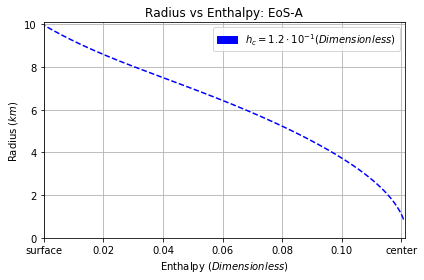

In [28]:
import matplotlib as mpl
# mpl.rc('text', usetex = True)
plt.title("Radius vs Enthalpy: EoS-A")
plt.plot(h_eosa[::-1],r_array[:],'b--')
plt.xlabel(r'Enthalpy $(Dimensionless)$')
plt.xscale('linear')
plt.ylim(0.0,10.09)
plt.xlim(0.0,0.1211)
ax = plt.gca()
plt.xticks([0.0,0.02,0.04,0.06,0.08,0.1,0.12],
          [r'surface','0.02','0.04','0.06','0.08','0.10', r'center'])
plt.ylabel(r'Radius $(km)$')
red_patch = mpatches.Patch(color='blue', label='$h_{c}=1.2 \cdot 10^{-1} (Dimensionless)$')
plt.legend(handles=[red_patch])
plt.tight_layout()
plt.grid(True)
plt.savefig("RvE_eosa.png")
plt.show()

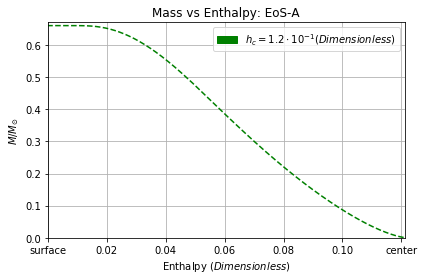

In [29]:
# mpl.rc('text', usetex = True)
plt.title("Mass vs Enthalpy: EoS-A")
plt.plot(h_eosa[::-1],m_array[:],'g--')
plt.xlabel(r'Enthalpy $(Dimensionless)$')
plt.xscale('linear')
plt.xlim(-0.0,0.1211)
plt.ylim(0.0,0.67)
# plt.ylabel('Mass (sol)')
ax = plt.gca()
plt.xticks([0.0,0.02,0.04,0.06,0.08,0.1,0.12],
          [r'surface','0.02','0.04','0.06','0.08','0.10', r'center'])
plt.ylabel(r'$M/M_{\odot}$', fontweight ='bold')
red_patch = mpatches.Patch(color='green', label='$h_{c}=1.2\cdot 10^{-1} (Dimensionless) $')
# ax.spines['bottom'].set_position(('data',0))
plt.legend(handles=[red_patch])
plt.tight_layout()
plt.grid(True)
plt.savefig("MvE_eosa.png")
plt.show()

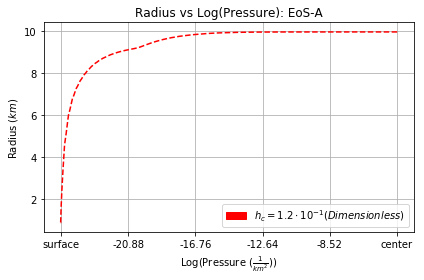

In [37]:
# mpl.rc('text', usetex = True)
plt.title("Radius vs Log(Pressure): EoS-A")
plt.plot(np.log10(p_eosa[:]), r_array[:],'r--')
plt.xlabel(r'Log(Pressure $(\frac{1}{km^2})$)')
plt.ylabel(r'Radius $(km)$')
# plt.xlabel('Radius $1/km^{2}$',fontweight ='bold')
plt.xscale('linear')
ax = plt.gca()
# -25,-20.88,-16.76,-12.64,-8.52,-4.4
plt.xticks([-4.4,-8.52,-12.64,-16.76,-20.88,-25],
          [r'center','-8.52','-12.64','-16.76','-20.88', r'surface'])
# plt.ylabel(r'Pressure $\frac{1}{km^2}$',fontweight ='bold')
# plt.ylabel(r'Pressure $1/km^{2}$',fontweight ='bold')
red_patch = mpatches.Patch(color='red', label='$h_{c}=1.2\cdot 10^{-1} (Dimensionless) $')
plt.legend(handles=[red_patch])
plt.tight_layout()
plt.grid(True)
plt.savefig("RvP_eosa.png")
plt.show()

In [31]:
# col_format = "{:<15}" * 2 + "\n" # 2 left-justfied columns with 5 character width

# with open("interpolatedEOSA.txt","w") as f:
#     for (h_eosa,p_eosa,e_eosa) in zip(h_eosa,p_eosa,e_eosa):
#         f.write(col_format.format(*x))
#          f.write('%01.15e'%(e_eosa))

In [32]:
# with open("file.txt", "w") as f:
#     f.writelines(map("{},{},{}\n".format, h_eosa, e_eosa, p_eosa))

In [33]:

# np.savetxt('interpolatedEOSA.txt',(h_eosa, e_eosa, p_eosa),fmt='%01.15e')

In [34]:
with open('InterpolatedEOSA.txt', 'w') as file:
    file.write('Enthalpy                         ')
    file.write('Pressure                         ')
    file.write('Energy  ')
    file.write('\n')
    file.write('%01.15e'% (h_eosa[-1]) + '     ')
    file.write('%01.15e'%(p_eosa[-1])+'       ')
    file.write('%01.15e'%(e_eosa[-1]))
    file.write('\n')


#     r_array.append(y[0]**0.5)
#     m_array.append(y[1])
#     #h_array.append(h)
    i=len(h_eosa)-1
    while i>0:
#         print(h, end='\r')
#         y = star.rk4step(i)
#         print(i)
        i-=1
#         m_array.append(y[1])
#         r_array.append(y[0]**0.5) 
        #h_array.append(h) #will not need this line for new code
        file.write('%01.15e'%(h_eosa[i])+'       ')
        file.write('%01.15e'%(p_eosa[i])+'        ')
        file.write('%01.15e'%(e_eosa[i])+'')
        file.write('\n')